In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [22]:
bikes = pd.read_csv(r'E:\day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bikes.shape

(730, 16)

In [9]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


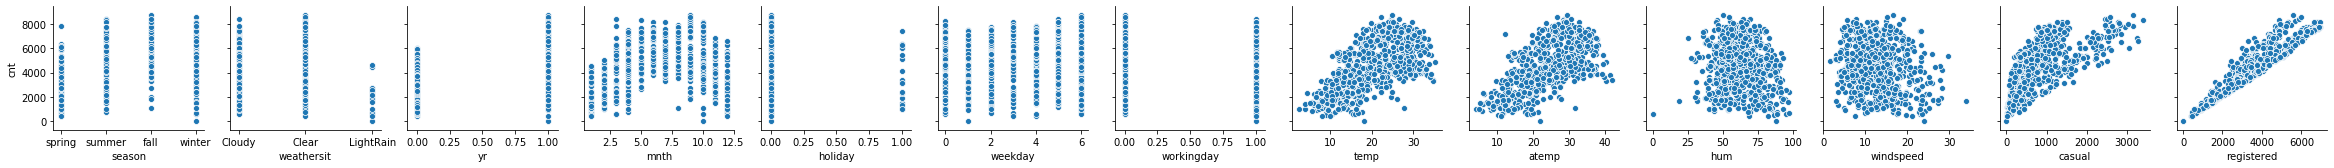

In [74]:
sns.pairplot(data=bikes,x_vars=['season','weathersit','yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'],y_vars='cnt')
plt.show()

In [24]:
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [25]:
cleanup_nums = {"season":     {1: "spring", 2: "summer",3:"fall",4:"winter"},
                "weathersit": {1: "Clear", 2: "Cloudy", 3: "LightRain", 4: "Thunderstorm" }
               }
bikes.replace(cleanup_nums, inplace=True)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [78]:
df_train, df_test = train_test_split(bikes,train_size=0.7, random_state=100)
df_train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [30]:
df_train.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.680392,0.507843,6.541176,0.025490,2.990196,0.676471,20.108257,23.500287,63.123710,12.834912,837.633333,3647.703922,4485.337255
std,209.596164,0.500429,3.465416,0.157763,2.017093,0.468282,7.431626,8.090963,14.153170,5.292031,675.936359,1578.410906,1950.666077
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,2.000000,20.000000,22.000000
25%,187.250000,0.000000,3.000000,0.000000,1.000000,0.000000,13.606865,16.603063,52.270825,9.041918,311.000000,2468.250000,3120.000000
50%,373.000000,1.000000,7.000000,0.000000,3.000000,1.000000,20.277923,24.131150,63.437500,12.083182,700.000000,3657.000000,4530.000000
75%,552.750000,1.000000,10.000000,0.000000,5.000000,1.000000,26.615847,30.177700,73.250025,15.750879,1076.250000,4841.000000,5973.500000
max,729.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.041700,34.000021,3283.000000,6946.000000,8714.000000


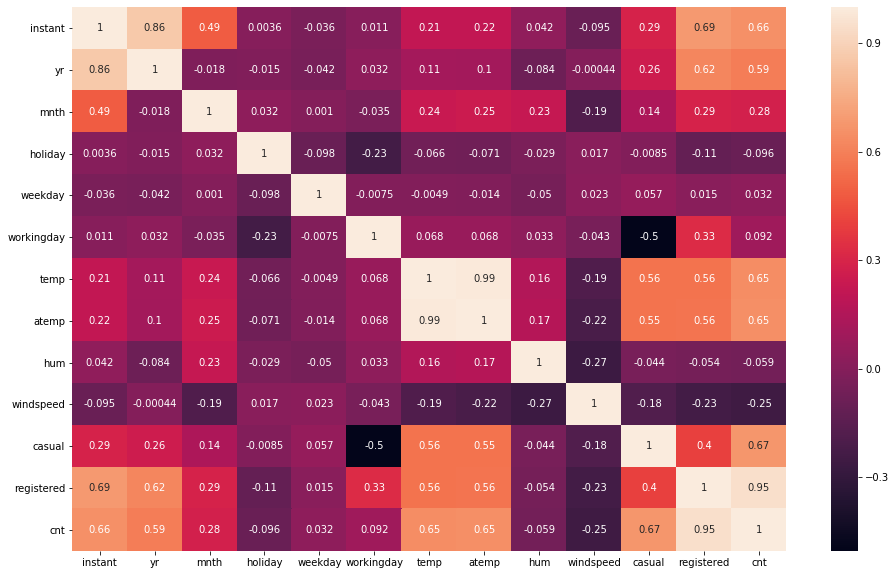

In [44]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [81]:
df_train, df_test = train_test_split(bikes,train_size=0.7, random_state=100)
num_vars = ['temp', 'hum',
       'casual', 'registered']
X_train= df_train[num_vars]
y_train= df_train.pop('cnt')

In [82]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.524e+31
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:49:44   Log-Likelihood:                 12860.
No. Observations:                 510   AIC:                        -2.571e+04
Df Residuals:                     505   BIC:                        -2.569e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.242e-13   6.38e-13      1.292      0.197   -4.29e-13    2.08e-12
temp       -6.217e-14   2.26e-14     -2.756      0.006   -1.07e-13   -1.78e-14
hum         5.951e-14   8.85e-15      6.722      0.000    4.21e-14    7.69e-14
casual         1.0000   2.19e-16   4.57e+15      0.000       1.000       1.000
registered     1.0000   9.42e-17   1.06e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       17.135   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.283
Skew:                          -0.009   Prob(JB):                       0.0159
Kurtosis:                       2.376   Cond. No.                     2.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

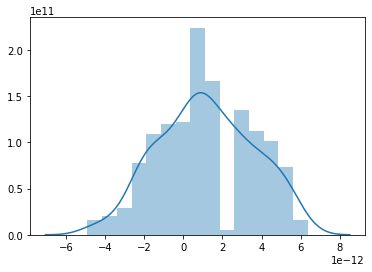

In [83]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train-y_train_pred
sns.distplot(res)

In [84]:
num_vars = ['temp', 'hum',
       'casual', 'registered']
X_test= df_test[num_vars]
y_test= df_test.pop('cnt')

In [85]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [86]:
r2_score(y_test,y_test_pred)

1.0